# Cardiovascular diseases Detection


Heart failure is a common event caused by Cardiovascular diseases(CVDs) and this dataset contains 11 features that can be used to predict a possible heart disease.

Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

918 observations total

This description was taken from https://www.kaggle.com/fedesoriano/heart-failure-prediction

### Hypothesis and thoughts

I would like to hypothesize that men are more likely to contract CVD than women ceterus parabus (all things equal). This data may be a little unrealistic due to the small sample size but I will work with what I have.

In [1]:
#Import Necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Load in the data set
df = pd.read_csv('heart.csv')

### Exploratory Data Analysis

In [3]:
display(df.describe())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
display(df.tail())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [7]:
#Check for nulls
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [8]:
#Drop any empty rows, there are none already but just proving it
df.dropna(axis=0, inplace = True)

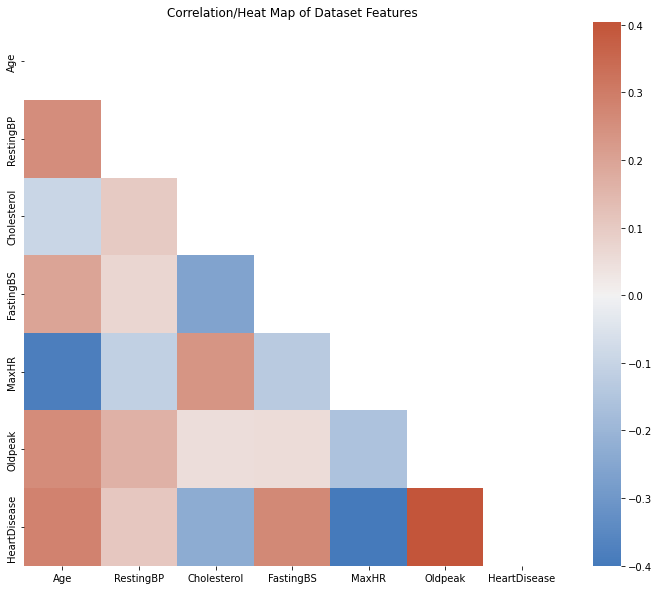

In [9]:
#Plot correlation heatmap

"""
From the chart it looks like Age, Max Heart rate, Old peak, resting blood pressure and fasting blood sugar have the strongest
correlations tied to CVD
"""

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0)
plt.title('Correlation/Heat Map of Dataset Features')
plt.show()

### Data Preparation

In [10]:
#Encode the categorical variables
label_encoder1 = LabelEncoder()
df['Sex'] = label_encoder1.fit_transform(df['Sex'])

label_encoder2 = LabelEncoder()
df['ChestPainType'] = label_encoder2.fit_transform(df['ChestPainType'])

label_encoder3 = LabelEncoder()
df['RestingECG'] = label_encoder3.fit_transform(df['RestingECG'])

label_encoder4 = LabelEncoder()
df['ExerciseAngina'] = label_encoder4.fit_transform(df['ExerciseAngina'])

label_encoder5 = LabelEncoder()
df['ST_Slope'] = label_encoder5.fit_transform(df['ST_Slope'])

#Separate out the dataframe into targets and features
features = df.iloc[:,:-1]
targets = df.iloc[:,-1]

#Scale the data
scale = StandardScaler()
scale.fit(features)
features = scale.transform(features)

#Combine features and target into a dataframe
scaled_features = pd.DataFrame(features,columns = df.columns[:-1])

#Create a train test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, targets, test_size=0.30, random_state=42)

display(scaled_features.describe())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-1.083616e-16,-7.740117e-18,1.548023e-17,1.954380e-16,0.000000,-3.096047e-17,9.288140e-17,4.953675e-16,-3.870058e-18,1.238419e-16,7.740117e-17
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-2.706015e+00,-1.938163e+00,-8.169950e-01,-7.154995e+00,-1.818435,-5.513413e-01,-1.566710e+00,-3.018469e+00,-8.235563e-01,-3.271482e+00,-2.244270e+00
25%,-6.906294e-01,5.159524e-01,-8.169950e-01,-6.699346e-01,-0.233704,-5.513413e-01,1.725451e-02,-6.605778e-01,-8.235563e-01,-8.324324e-01,-5.960781e-01
50%,5.188098e-02,5.159524e-01,-8.169950e-01,-1.295128e-01,0.221363,-5.513413e-01,1.725451e-02,4.678968e-02,-8.235563e-01,-2.695748e-01,-5.960781e-01
75%,6.883185e-01,5.159524e-01,1.275059e+00,4.109089e-01,0.623835,-5.513413e-01,1.725451e-02,7.541571e-01,1.214246e+00,5.747115e-01,1.052114e+00
max,2.491558e+00,5.159524e-01,2.321086e+00,3.653439e+00,3.697252,1.813758e+00,1.601219e+00,2.561874e+00,1.214246e+00,4.983762e+00,1.052114e+00


### Create and Test the model for accuracy and other metrics

In [11]:
"""
This model returns an 88% accuracy which is fairly accurate.
The FP rate is nominally low which is a good thing.
Recall is 89% on class zero (No CVD) and 87% on class one, but
it may be able to be improved with more data, stronger models, and better features.
"""

#Create Logistic Regression
log_reg = LogisticRegression()

#Fit the training data on the logistic Regression
log_reg.fit(X_train,y_train)

#Use the test data to see how well the model works
test_pred = log_reg.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test,test_pred))

#Classification Matrix
print(classification_report(y_test,test_pred))

[[100  12]
 [ 22 142]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



### Feature importance

In [12]:
print(log_reg.coef_, log_reg.intercept_)

[[ 0.13249674  0.45477736 -0.56899172  0.04132321 -0.38995     0.42876924
  -0.14598224 -0.13954706  0.58681435  0.47770573 -0.99772552]] [0.31681333]


In [13]:
"""
It seems like what Sex you are has a positive on effect on determining if you will have CVD
"""

#Create a DF of all the features and their respective coefficients
coefs = pd.DataFrame(zip(X_train.columns, np.transpose(log_reg.coef_)), columns=['features', 'coef']) 

print(coefs)

          features                    coef
0              Age    [0.1324967380738196]
1              Sex    [0.4547773562836765]
2    ChestPainType   [-0.5689917164675599]
3        RestingBP   [0.04132320959619568]
4      Cholesterol  [-0.38994999869268204]
5        FastingBS    [0.4287692400271379]
6       RestingECG  [-0.14598223660251336]
7            MaxHR   [-0.1395470619666628]
8   ExerciseAngina    [0.5868143512803538]
9          Oldpeak     [0.477705734969647]
10        ST_Slope   [-0.9977255213972895]


In [14]:
"""
From creating my own data points, it seems when I only change the sex for the data points from male to female,
the predicted probability decreases of CVD from 43% liklihood of having it to 20% liklihood. This would help me indicate
that women are 20% less likely to have CVD than men ceterus parabus.

"""

male_val = []
female_val = []

#Suppress warnings from not having a labeled sample test data
import warnings
warnings.filterwarnings("ignore")

#Loop through the different ages to find the probabilities of having CVD for both males and females
for i in range(1,100):
    
    #Create a completely new data point with only Sex being different and predict probality to 
    #see how much Sex has an effect on CVD risk

    male = np.array([i,1.0,2.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0]).reshape(1, -1)
    female = np.array([i,0.0,2.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0]).reshape(1, -1)

    #Scale the data for the model
    male_scaled = scale.transform(male)
    female_scaled = scale.transform(female)
    
    #Store predictions
    male_val.append(round(float(log_reg.predict_proba(male_scaled)[:,1]),4)*100)
    female_val.append(round(float(log_reg.predict_proba(female_scaled)[:,1]),4)*100)

#Create a dataframe of male and female data
data = {"Male" : male_val, "Female" : female_val}
sex_df = pd.DataFrame(data, columns = ['Male', 'Female'])

#Feature engineer the difference column to keep track of the % differences between male and female
sex_df['Difference'] = sex_df['Male'] - sex_df['Female']

#Set index to ages
sex_df.set_index(pd.Index([i for i in range(1,100)]), 'Male', inplace = True)

display(sex_df)

,Male,Female,Difference
1,27.58,11.09,16.49
2,27.86,11.23,16.63
3,28.14,11.37,16.77
4,28.43,11.51,16.92
5,28.71,11.66,17.05
...,...,...,...
95,58.80,31.85,26.95
96,59.14,32.16,26.98
97,59.47,32.47,27.00
98,59.81,32.77,27.04


### Conclusion

In the end, it appears my hypothesis was indeed correct that men are more likely to have CVD atleast according to my model. The gap in risk between sexes increases as age goes up. For example, at age 40 a male is 22% more likely to have CVD than a female counter part. Any negative values would show at what ages females are more likely to have CVD ceterus parabus, though none exist which supports my hypothesis

Let it be known that the create sample to test most closely resembles a 46 year old man (pulled from the first entry in the data set given). To make this model more realstic, I would need data on the average health of each and every age. This could be done realistically in a larger dataset with 100x the size of entries but would be unrealistic in the 918 sample size that was given to me. With that, I believe I could create a production level model that could be used by health professionals to help determine % chance of a person having CVD.

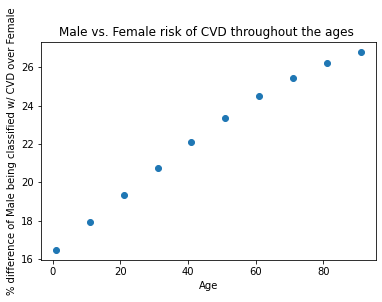

In [15]:
#Display the final results
plt.scatter(sex_df.index[::10], sex_df.Difference[::10])
plt.xlabel('Age')
plt.ylabel('% difference of Male being classified w/ CVD over Female')
plt.title('Male vs. Female risk of CVD throughout the ages ')
plt.show()